In [1]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [3]:
tokenizer = Tokenizer(num_words=1000)

In [4]:
tokenizer.fit_on_texts(samples)

In [5]:
sequences = tokenizer.texts_to_sequences(samples)

In [9]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [11]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [14]:
one_hot_results.shape

(2, 1000)

In [13]:
word_index = tokenizer.word_index
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [15]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [16]:
embedding_layer

In [17]:
from keras.datasets import imdb
from keras import preprocessing

In [18]:
max_features = 10000
max_len = 20

(x_train, y_train), (x_test, y_test)  = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [19]:
x_train.shape

(25000, 20)

In [20]:
x_test.shape

(25000, 20)

In [24]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
   32/20000 [..............................] - ETA: 37s - loss: 0.6925 - acc: 0.5625

/home/koichiro_mori/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


20000/20000 [==============================] - 1s 72us/step - loss: 0.6741 - acc: 0.6122 - val_loss: 0.6290 - val_acc: 0.6906
Epoch 2/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.5507 - acc: 0.7502 - val_loss: 0.5306 - val_acc: 0.7284
Epoch 3/10
20000/20000 [==============================] - 1s 67us/step - loss: 0.4646 - acc: 0.7860 - val_loss: 0.4986 - val_acc: 0.7456
Epoch 4/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.4221 - acc: 0.8095 - val_loss: 0.4902 - val_acc: 0.7544
Epoch 5/10
20000/20000 [==============================] - 1s 67us/step - loss: 0.3938 - acc: 0.8249 - val_loss: 0.4904 - val_acc: 0.7552
Epoch 6/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.3714 - acc: 0.8378 - val_loss: 0.4933 - val_acc: 0.7554
Epoch 7/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.3515 - acc: 0.8472 - val_loss: 0.4984 - val_acc: 0.7558
Epoch 8/10
20000/20000 [============================

# IMDbの単語埋め込み

In [28]:
import os

imdb_dir = './data/aclImdb'

train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [29]:
len(texts)

25000

In [30]:
len(labels)

25000

In [31]:
texts[0]

'Well, I hate hollywood, but love cinema so i have to watch these cruddy movies in theaters. And, I was hoping Vanilla Sky would be good. i was hoping that they would either keep the original "Open Your Eyes" exactly the same, or they would make it their own. Well, it happened to be a little bit of both, and it sucked.<br /><br />It started out good. I love Radiohead. I wish there was more of that. But by the end we are listening to Good Vibrations by The Beach Boys. Talk about a wide range of suck between. They had one or two good songs in the club and maybe a couple others, but why oh why did they have to blare GV during the climax. It was more annoying than confusing or blatant. Especially when it has NOTHING TO DO WITH THE PLOT. At least put some meaning behind the songs. Kid A = primary. Whatever.<br /><br />He also did a bang up job with the club scene. That was cool. Otherwise the movie was one big ball of arrogance. As if audiences would get the movie. The ones that would get i

In [32]:
labels[0]

0

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [34]:
max_len = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [35]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [42]:
len(sequences)

25000

In [44]:
print(sequences[0])

[70, 10, 780, 359, 18, 116, 434, 35, 10, 25, 5, 103, 131, 99, 8, 2253, 2, 10, 13, 1379, 6702, 1740, 59, 27, 49, 10, 13, 1379, 12, 33, 59, 342, 398, 1, 201, 906, 126, 520, 614, 1, 169, 39, 33, 59, 94, 9, 65, 202, 70, 9, 571, 5, 27, 3, 114, 224, 4, 196, 2, 9, 2064, 7, 7, 9, 642, 43, 49, 10, 116, 10, 654, 47, 13, 50, 4, 12, 18, 31, 1, 127, 72, 23, 2615, 5, 49, 31, 1, 2576, 1009, 735, 41, 3, 1866, 2196, 4, 2766, 197, 33, 66, 28, 39, 104, 49, 687, 8, 1, 1328, 2, 276, 3, 375, 405, 18, 135, 446, 135, 119, 33, 25, 5, 312, 1, 1326, 9, 13, 50, 613, 71, 1495, 39, 4138, 258, 51, 9, 44, 161, 5, 78, 16, 1, 111, 30, 219, 273, 46, 1213, 493, 1, 687, 550, 3, 4077, 841, 7, 7, 26, 79, 119, 3, 4010, 53, 289, 16, 1, 1328, 133, 12, 13, 643, 894, 1, 17, 13, 28, 191, 1867, 4, 7576, 14, 45, 1217, 59, 76, 1, 17, 1, 659, 12, 59, 76, 9, 329, 2567, 2, 1, 357, 525, 91, 14, 603, 14, 12, 1, 4449, 185, 29, 5794, 53, 10, 158, 6627, 1, 8595, 4449, 1868, 33, 221, 1, 5120, 5745, 311, 156, 2, 46, 4, 1, 405, 2, 10, 780, 319

In [47]:
word_index = tokenizer.word_index
print(len(word_index))

88582


In [67]:
list(word_index.keys())[:10]

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']

In [50]:
data = pad_sequences(sequences, maxlen=max_len)
print(data.shape)

(25000, 100)


In [51]:
labels = np.asarray(labels)
print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [53]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [54]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [55]:
x_train.shape

(200, 100)

In [56]:
y_train.shape

(200,)

In [57]:
x_val.shape

(10000, 100)

In [58]:
y_val.shape

(10000,)

In [62]:
glove_dir = './data/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))

400000


In [76]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [77]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [79]:
embedding_matrix.shape

(10000, 100)

In [80]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [82]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [83]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.7712 - acc: 0.5350 - val_loss: 0.7577 - val_acc: 0.5044
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5861 - acc: 0.6650 - val_loss: 1.0721 - val_acc: 0.5022
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4285 - acc: 0.8700 - val_loss: 0.8419 - val_acc: 0.5132
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3114 - acc: 0.8900 - val_loss: 0.6943 - val_acc: 0.5721
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2483 - acc: 0.9050 - val_loss: 0.7173 - val_acc: 0.5563
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1267 - acc: 1.0000 - val_loss: 1.7208 - val_acc: 0.5024
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.8900 - val_loss: 0.7702 - val_acc: 0.5594
Epoch 8/10
200/200 [========

In [87]:
model.save('models/pre_trained_glove_model.h5')

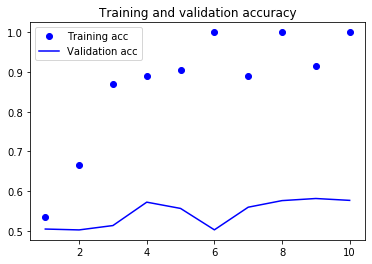

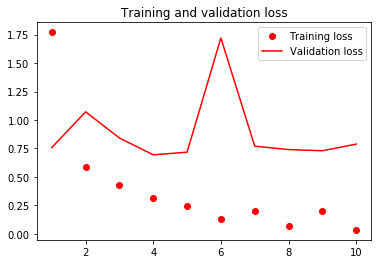

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

In [89]:
model.load_weights('models/pre_trained_glove_model.h5')

In [90]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 35us/step


[0.7897659016036988, 0.5701599717140198]

## RNN

In [91]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

In [92]:
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

In [95]:
len(successive_outputs)

100

In [96]:
len(successive_outputs[0])

64

In [99]:
final_output_sequence = np.stack(successive_outputs, axis=0)

In [100]:
final_output_sequence.shape

(100, 64)

In [101]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [103]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [104]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [107]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [108]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train))
print(len(input_test))

25000
25000


In [109]:
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

In [110]:
input_train.shape

(25000, 500)

In [111]:
input_test.shape

(25000, 500)

In [114]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/home/koichiro_mori/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6620 - acc: 0.5829 - val_loss: 0.5007 - val_acc: 0.7796
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4244 - acc: 0.8141 - val_loss: 0.4021 - val_acc: 0.8276
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3038 - acc: 0.8781 - val_loss: 0.3999 - val_acc: 0.8264
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2277 - acc: 0.9115 - val_loss: 0.5270 - val_acc: 0.7654
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1638 - acc: 0.9405 - val_loss: 0.3866 - val_acc: 0.8508
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1016 - acc: 0.9657 - val_loss: 0.4412 - val_acc: 0.8366
Epoch 7/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0596 - acc: 0.9821 - val_loss: 0.5168 - val_acc:

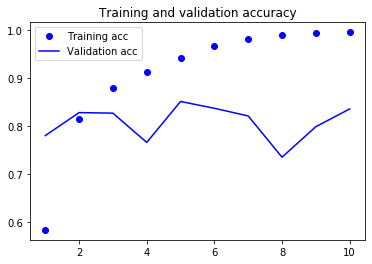

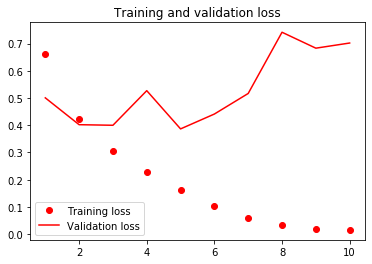

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [118]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/home/koichiro_mori/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.5003 - acc: 0.7688 - val_loss: 0.3206 - val_acc: 0.8722
Epoch 2/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2900 - acc: 0.8885 - val_loss: 0.3598 - val_acc: 0.8446
Epoch 3/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2314 - acc: 0.9148 - val_loss: 0.4077 - val_acc: 0.8702
Epoch 4/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2004 - acc: 0.9269 - val_loss: 0.3826 - val_acc: 0.8444
Epoch 5/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1755 - acc: 0.9365 - val_loss: 0.3673 - val_acc: 0.8382
Epoch 6/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1581 - acc: 0.9435 - val_loss: 0.3367 - val_acc: 0.8858
Epoch 7/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1422 - acc: 0.9491 - val_loss: 0.3573 - val_acc:

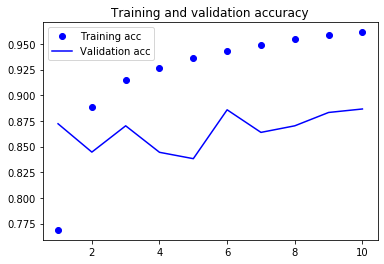

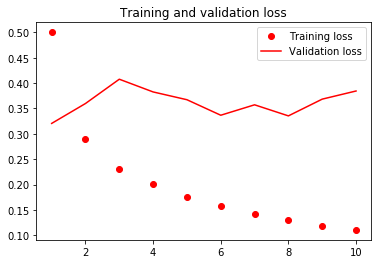

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 時系列データ

In [1]:
import os

data_dir = './data/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

In [2]:
f = open(fname)
data = f.read()
f.close()

In [3]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

In [4]:
header

['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"rh (%)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"sh (g/kg)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"max. wv (m/s)"',
 '"wd (deg)"']

In [5]:
len(lines)

420551

In [6]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [7]:
float_data.shape

(420551, 14)

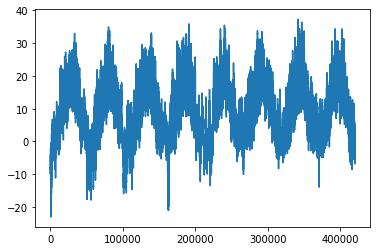

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.show()

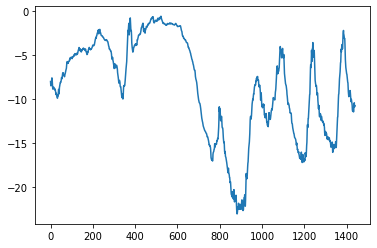

In [10]:
plt.plot(range(1440), temp[:1440])

In [11]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [12]:
float_data.shape

(420551, 14)

In [13]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [15]:
lookback = 1440  # 1440 / 60 / 10 = 過去10日間のデータを使用
step = 6     # 6 * 10 = 60分間隔でデータを取得
delay = 144  # 目的値は24時間後 = 24 * 60 / 10 = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [16]:
val_steps = (300000 - 200001 - lookback) // batch_size
val_steps

769

In [17]:
test_steps = (len(float_data) - 300001 - lookback) // batch_size
test_steps

930

In [18]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        # samples = (32, 240, 14)  # 240は1440/6、14は特徴量（1が気温）
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [19]:
evaluate_naive_method()

0.2897359729905486


In [20]:
celsius_mae = 0.28960 * std[1]
celsius_mae

2.563683734206458

In [21]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [161]:
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 13s 25ms/step - loss: 1.3890 - val_loss: 0.7228
Epoch 2/20
500/500 [==============================] - 12s 25ms/step - loss: 0.4877 - val_loss: 0.4266
Epoch 3/20
500/500 [==============================] - 13s 25ms/step - loss: 0.3306 - val_loss: 0.3629
Epoch 4/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2937 - val_loss: 0.6034
Epoch 5/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2808 - val_loss: 0.5958
Epoch 6/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2735 - val_loss: 0.4720
Epoch 7/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2662 - val_loss: 0.4687
Epoch 8/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2612 - val_loss: 0.4023
Epoch 9/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2620 - val_loss: 0.4761
Epoch 10/20
500/500 [==============================] - 13s 25ms/step - loss: 0.257

In [162]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [164]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [165]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

In [166]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 153s 307ms/step - loss: 0.3274 - val_loss: 0.5547
Epoch 2/20
500/500 [==============================] - 145s 290ms/step - loss: 0.2939 - val_loss: 0.4387
Epoch 3/20
500/500 [==============================] - 146s 291ms/step - loss: 0.2904 - val_loss: 0.4768
Epoch 4/20
500/500 [==============================] - 146s 292ms/step - loss: 0.2844 - val_loss: 0.6133
Epoch 5/20
500/500 [==============================] - 145s 291ms/step - loss: 0.2780 - val_loss: 0.6269
Epoch 6/20
500/500 [==============================] - 145s 289ms/step - loss: 0.2764 - val_loss: 0.6507
Epoch 7/20
500/500 [==============================] - 144s 288ms/step - loss: 0.2764 - val_loss: 0.5813
Epoch 8/20
500/500 [==============================] - 144s 288ms/step - loss: 0.2728 - val_loss: 0.6176
Epoch 9/20
500/500 [==============================] - 144s 288ms/step - loss: 0.2695 - val_loss: 0.7592
Epoch 10/20
500/500 [==============================] - 143s 287m

val_loss: 0.4387

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.1,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 158s 316ms/step - loss: 34083.3720 - val_loss: 0.2141
Epoch 2/40
500/500 [==============================] - 154s 309ms/step - loss: 10252.1280 - val_loss: 0.0874
Epoch 3/40
500/500 [==============================] - 155s 309ms/step - loss: 4652.4545 - val_loss: 0.0898
Epoch 4/40
500/500 [==============================] - 155s 309ms/step - loss: 1120.7058 - val_loss: 0.0586
Epoch 5/40
500/500 [==============================] - 155s 309ms/step - loss: 4248.5648 - val_loss: 0.0807
Epoch 6/40
500/500 [==============================] - 154s 308ms/step - loss: 3.2344 - val_loss: 0.0751
Epoch 7/40
500/500 [==============================] - 150s 300ms/step - loss: 2267.5234 - val_loss: 0.0721
Epoch 8/40
500/500 [==============================] - 150s 299ms/step - loss: 33556.8667 - val_loss: 0.0683
Epoch 9/40
500/500 [==============================] - 150s 299ms/step - loss: 2542.0614 - val_loss: 0.0733
Epoch 10/40
500/500 [================

In [22]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [30]:
model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.1, return_sequences=True, input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu', dropout=0.2, recurrent_dropout=0.1))
model.add(layers.Dense(1))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, None, 32)          4512      
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=RMSprop(), loss='mae')

In [33]:
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 212s 423ms/step - loss: 284381.1983 - val_loss: 0.1814
Epoch 2/40
500/500 [==============================] - 202s 404ms/step - loss: 8953.7375 - val_loss: 0.1152
Epoch 3/40
500/500 [==============================] - 195s 391ms/step - loss: 5475.1896 - val_loss: 0.0970
Epoch 4/40
500/500 [==============================] - 211s 422ms/step - loss: 115.8549 - val_loss: 0.1117
Epoch 5/40
500/500 [==============================] - 209s 418ms/step - loss: 2954.5788 - val_loss: 0.0954
Epoch 6/40
 86/500 [====>.........................] - ETA: 2:03 - loss: 62.8292

KeyboardInterrupt: 

In [34]:
model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 114s 228ms/step - loss: 0.2935 - val_loss: 0.2740
Epoch 2/40
123/500 [======>.......................] - ETA: 1:05 - loss: 0.2753

KeyboardInterrupt: 

In [35]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [36]:
max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [38]:
# (batch, seq_len)
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

In [39]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [41]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [43]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [45]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/koichiro_mori/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 548us/step - loss: 1.5412 - acc: 0.4985 - val_loss: 0.7022 - val_acc: 0.5062
Epoch 2/10
20000/20000 [==============================] - 11s 533us/step - loss: 0.6832 - acc: 0.5967 - val_loss: 0.6797 - val_acc: 0.6276
Epoch 3/10
20000/20000 [==============================] - 10s 521us/step - loss: 0.6515 - acc: 0.7399 - val_loss: 0.6550 - val_acc: 0.6768
Epoch 4/10
20000/20000 [==============================] - 10s 506us/step - loss: 0.6014 - acc: 0.8144 - val_loss: 0.5895 - val_acc: 0.7666
Epoch 5/10
20000/20000 [==============================] - 11s 532us/step - loss: 0.4984 - acc: 0.8368 - val_loss: 0.4604 - val_acc: 0.8156
Epoch 6/10
20000/20000 [==============================] - 11s 527us/step - loss: 0.3793 - acc: 0.8622 - val_loss: 0.4058 - val_acc: 0.8380
Epoch 7/10
20000/20000 [==============================] - 11s 538us/step - loss: 0.3264 - acc: 0.8820 - val_loss: 0.3

In [49]:
# Conv1D + RNN
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(280, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

In [50]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 276, 32)           2272      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 92, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 88, 32)            5152      
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
